# 1. Perkenalan

- Nama Group : RepiuBoss
- Batch : 015
- Dataset : Review Tokopedia (https://www.kaggle.com/datasets/farhan999/tokopedia-product-reviews)
- Objectives : Collecting product or services comment reviews, clustering the isues from reviews, and sorting the data into easy readable summary.

# 2. Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import gensim

# Exploratory Dataset

import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Text Preprocessing

import re
import string
from nltk.tokenize import word_tokenize
# import nltk.stem as stemmer
from nltk.stem.porter import *
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory as stemmer

# Metrics and Validation

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Embedding Layer

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, TextVectorization, GlobalAveragePooling1D, Input, LSTM, GRU, Dropout, Dense

from urllib import request
from PIL import Image

In [2]:
# Download Stopwords and Punkt

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stevenkusuma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stevenkusuma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 3. Data Loading

In [3]:
# Load Dataset

data = pd.read_csv('product_reviews_dirty.csv')
data

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,1,Barang sesuai pesanan dan cepat sampai,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1,1740837,https://www.tokopedia.com/shakaonline87/staple...
1,2,Barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
2,3,Paket rapi...mantap....cepat....sampe ke tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
3,4,ya saya puas dgn barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,5,771395,https://www.tokopedia.com/kamarmesin/alat-stap...
4,5,Responya luar biasa b mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,787,969999,https://www.tokopedia.com/mitrapersada/isi-ref...
...,...,...,...,...,...,...,...,...,...
40602,40889,gak bisa ditutup.. ukuran gak pas..,1,olahraga,MINERAL WATER POT WATER PURIFIER 28 liter BIO ...,144442054,2,648559,https://www.tokopedia.com/pusatdermawand/miner...
40603,40890,Penjual krg peduli dan brg jelek. Brg yg dikir...,1,olahraga,PANCI PRESTO IDEALIFE 7 LITER - IL 707 &#40; I...,313781913,1,648559,https://www.tokopedia.com/pusatdermawand/panci...
40604,40891,"pelayanan kurang sigap, berhari2 dr nanya baik...",1,olahraga,EXCIDER BIKE 2 - sepeda fitnes magnetic lipat ...,71873370,1,648559,https://www.tokopedia.com/pusatdermawand/excid...
40605,40892,"barang yg dikirim tsk sesuai wrn, kl memang dr...",1,olahraga,TOTAL FITNES ALAT FITNESS SIT UP BENCH TOTAL &...,201690705,2,648559,https://www.tokopedia.com/pusatdermawand/total...


In [4]:
kamus_2 = pd.read_csv('kamus_2.txt', sep="	", header=None,names=['slang', 'fix'])

In [5]:
kamus_2.tail()

,slang,fix
1314,istaa,nista
1315,benarjujur,benar
1316,benarjujur,jujur
1317,sayan,sayang
1318,mgkin,mungkin


In [6]:
kamus_2.drop(index=147, inplace=True)


In [7]:
kamus = kamus_2.append({'slang':'brg', 'fix':'barang'}, ignore_index=True)
kamus = kamus.append({'slang':'nggk', 'fix':'tidak'}, ignore_index=True)
kamus = kamus.append({'slang':'thankss', 'fix':'terima kasih'}, ignore_index=True)

/var/folders/hd/ljl6m4756zjf08kq1pmpvk680000gn/T/ipykernel_6274/1821775587.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kamus = kamus_2.append({'slang':'brg', 'fix':'barang'}, ignore_index=True)
/var/folders/hd/ljl6m4756zjf08kq1pmpvk680000gn/T/ipykernel_6274/1821775587.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kamus = kamus.append({'slang':'nggk', 'fix':'tidak'}, ignore_index=True)
/var/folders/hd/ljl6m4756zjf08kq1pmpvk680000gn/T/ipykernel_6274/1821775587.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kamus = kamus.append({'slang':'thankss', 'fix':'terima kasih'}, ignore_index=True)


In [8]:
slang_list = kamus['slang'].tolist()
fix_list = kamus['fix'].tolist()

In [9]:
kamus.tail()

,slang,fix
1316,sayan,sayang
1317,mgkin,mungkin
1318,brg,barang
1319,nggk,tidak
1320,thankss,terima kasih


In [10]:
data = data[data['category'].str.contains('handphone')]
data

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
3635,3659,"respons cepat, pelayanan oke. smoga langganan....",5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
3636,3660,Cakep dah... Lumayan dingin,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
3637,3661,Nggk tau ori apa nggk yg penting berfungsi dan...,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
3638,3662,mantap betul topp sesuai deskripsi dan gampang...,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
3639,3663,Barang blom di buka. Mudah mudahan bagus dan t...,5,handphone,OPPO F11 Smartphone 4GB/128GB - &#40;Garansi R...,484230658,9,1988271,https://www.tokopedia.com/planet-cell/oppo-f11...
...,...,...,...,...,...,...,...,...,...
10359,10435,brg sudah sampai thankss ......,4,handphone,Battery | Blackberry Battery Charger Bundle ...,1888064,2,105244,https://www.tokopedia.com/janbun/battery-black...
10360,10436,Nah kan jadi bisa kasih review.. Respon cepat....,5,handphone,Battery Charger | Blackberry Desktop Battery J...,3683652,3,105244,https://www.tokopedia.com/janbun/battery-charg...
10361,10437,"Mantab gan, langsung ane pake..maknyus",5,handphone,Battery Charger | Blackberry Desktop Battery J...,3683652,3,105244,https://www.tokopedia.com/janbun/battery-charg...
10362,10438,Tq gan :D\nTq gan :D\nTq gan :D\nTq gan :D\nTq...,5,handphone,BLACKBERRY EBC or Desktop Battery ASY-34812-00...,1592980,1,105244,https://www.tokopedia.com/janbun/blackberry-eb...


In [11]:
# Reset Index

data.reset_index(drop=True, inplace=True)
data

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,3659,"respons cepat, pelayanan oke. smoga langganan....",5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
1,3660,Cakep dah... Lumayan dingin,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
2,3661,Nggk tau ori apa nggk yg penting berfungsi dan...,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
3,3662,mantap betul topp sesuai deskripsi dan gampang...,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
4,3663,Barang blom di buka. Mudah mudahan bagus dan t...,5,handphone,OPPO F11 Smartphone 4GB/128GB - &#40;Garansi R...,484230658,9,1988271,https://www.tokopedia.com/planet-cell/oppo-f11...
...,...,...,...,...,...,...,...,...,...
6131,10435,brg sudah sampai thankss ......,4,handphone,Battery | Blackberry Battery Charger Bundle ...,1888064,2,105244,https://www.tokopedia.com/janbun/battery-black...
6132,10436,Nah kan jadi bisa kasih review.. Respon cepat....,5,handphone,Battery Charger | Blackberry Desktop Battery J...,3683652,3,105244,https://www.tokopedia.com/janbun/battery-charg...
6133,10437,"Mantab gan, langsung ane pake..maknyus",5,handphone,Battery Charger | Blackberry Desktop Battery J...,3683652,3,105244,https://www.tokopedia.com/janbun/battery-charg...
6134,10438,Tq gan :D\nTq gan :D\nTq gan :D\nTq gan :D\nTq...,5,handphone,BLACKBERRY EBC or Desktop Battery ASY-34812-00...,1592980,1,105244,https://www.tokopedia.com/janbun/blackberry-eb...


In [12]:
data.head()

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,3659,"respons cepat, pelayanan oke. smoga langganan....",5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
1,3660,Cakep dah... Lumayan dingin,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
2,3661,Nggk tau ori apa nggk yg penting berfungsi dan...,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
3,3662,mantap betul topp sesuai deskripsi dan gampang...,5,handphone,Baseus Holder Handphone Joystick with Cooling Fan,323093469,16,3178761,https://www.tokopedia.com/nicnaddigital/baseus...
4,3663,Barang blom di buka. Mudah mudahan bagus dan t...,5,handphone,OPPO F11 Smartphone 4GB/128GB - &#40;Garansi R...,484230658,9,1988271,https://www.tokopedia.com/planet-cell/oppo-f11...


In [13]:
data.tail()

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
6131,10435,brg sudah sampai thankss ......,4,handphone,Battery | Blackberry Battery Charger Bundle ...,1888064,2,105244,https://www.tokopedia.com/janbun/battery-black...
6132,10436,Nah kan jadi bisa kasih review.. Respon cepat....,5,handphone,Battery Charger | Blackberry Desktop Battery J...,3683652,3,105244,https://www.tokopedia.com/janbun/battery-charg...
6133,10437,"Mantab gan, langsung ane pake..maknyus",5,handphone,Battery Charger | Blackberry Desktop Battery J...,3683652,3,105244,https://www.tokopedia.com/janbun/battery-charg...
6134,10438,Tq gan :D\nTq gan :D\nTq gan :D\nTq gan :D\nTq...,5,handphone,BLACKBERRY EBC or Desktop Battery ASY-34812-00...,1592980,1,105244,https://www.tokopedia.com/janbun/blackberry-eb...
6135,10439,barang ok...........................,5,handphone,XIAOMI Charger CYSK10 2A with USB TYPE-C Original,42034026,1,105244,https://www.tokopedia.com/janbun/xiaomi-charge...


In [14]:
# Check Dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6136 entries, 0 to 6135
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    6136 non-null   int64 
 1   text          6136 non-null   object
 2   rating        6136 non-null   int64 
 3   category      6136 non-null   object
 4   product_name  6136 non-null   object
 5   product_id    6136 non-null   int64 
 6   sold          6136 non-null   object
 7   shop_id       6136 non-null   int64 
 8   product_url   6136 non-null   object
dtypes: int64(4), object(5)
memory usage: 431.6+ KB


Data terdiri dari `6,135 rows` dan `9 columns` :

- `9 String`

In [15]:
data.to_csv('handphone.csv')

# 4. Exploratory Data Analysis (EDA)

<AxesSubplot:ylabel='rating'>

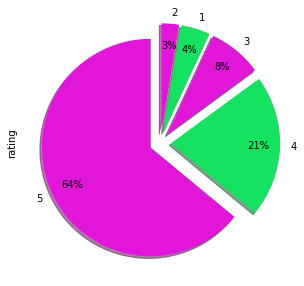

In [16]:
# Create Pie Chart to know rating distribution

data['rating'].value_counts().plot(kind='pie', autopct='%1.0f%%',
                                  shadow=True,
                                  startangle=90,
                                  pctdistance=0.8,
                                  explode= (0.1,0.1,0.1,0.1,0.1),
                                  colors=['#e216d9', '#16e261'],
                                  figsize=(5,5))

Data terdiri dari :

- `64%` adalah bintang 5
- `21%` adalah bintang 4
- `8%` adalah bintang 3
- `4%` adalah bintang 2
- `3%` adalah bintang 1



Word Cloud for 5 Star




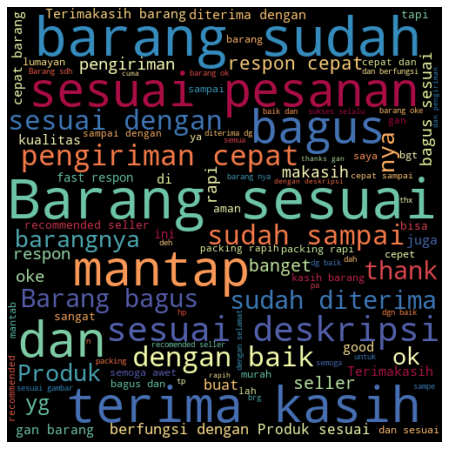

In [17]:
# Bintang 5 WordCloud
data_5 = data.loc[data['rating']==5]

#===
Message_body_5 = " ".join(insul for insul in data_5.text)

#== 
wc5 = WordCloud(background_color='black', mode='RGB',
               width=500, max_words=100, height=500,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
               
print('\n\nWord Cloud for 5 Star\n\n')
wc5.generate(Message_body_5)
plt.figure(figsize=(16, 8))
plt.imshow(wc5, interpolation='bilinear')
plt.axis('off')
plt.show()




Word Cloud for 4 Star




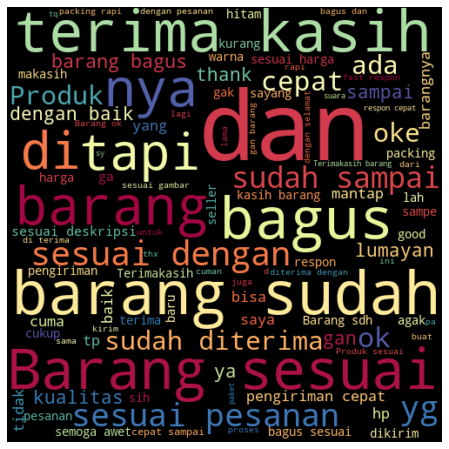

In [18]:
# Bintang 4 WordCloud
data_4 = data.loc[data['rating']==4]

#===
Message_body_4 = " ".join(insul for insul in data_4.text)

#== 
wc4 = WordCloud(background_color='black', mode='RGB',
               width=500, max_words=100, height=500,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
               
print('\n\nWord Cloud for 4 Star\n\n')
wc4.generate(Message_body_4)
plt.figure(figsize=(16, 8))
plt.imshow(wc4, interpolation='bilinear')
plt.axis('off')
plt.show()



Word Cloud for 3 Star




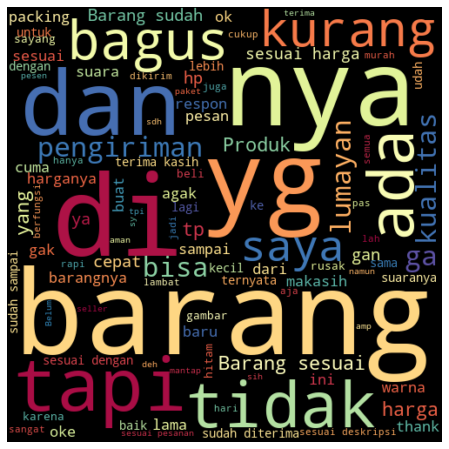

In [19]:
# Bintang 3 WordCloud
data_3 = data.loc[data['rating']==3]

#===
Message_body_3 = " ".join(insul for insul in data_3.text)

#== 
wc3 = WordCloud(background_color='black', mode='RGB',
               width=500, max_words=100, height=500,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
               
print('\n\nWord Cloud for 3 Star\n\n')
wc3.generate(Message_body_3)
plt.figure(figsize=(16, 8))
plt.imshow(wc3, interpolation='bilinear')
plt.axis('off')
plt.show()



Word Cloud for 2 Star




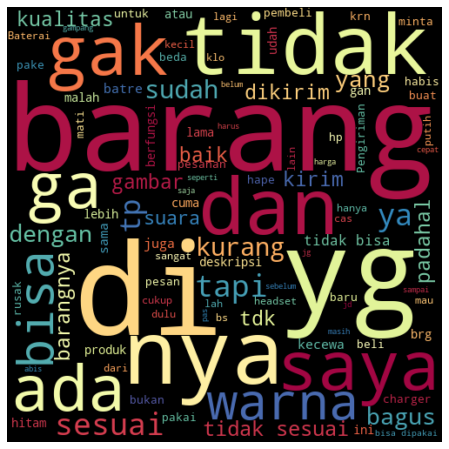

In [20]:
# Bintang 2 WordCloud
data_2 = data.loc[data['rating']==2]

#===
Message_body_2 = " ".join(insul for insul in data_2.text)

#== 
wc2 = WordCloud(background_color='black', mode='RGB',
               width=500, max_words=100, height=500,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
               
print('\n\nWord Cloud for 2 Star\n\n')
wc2.generate(Message_body_2)
plt.figure(figsize=(16, 8))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()



Word Cloud for 1 Star




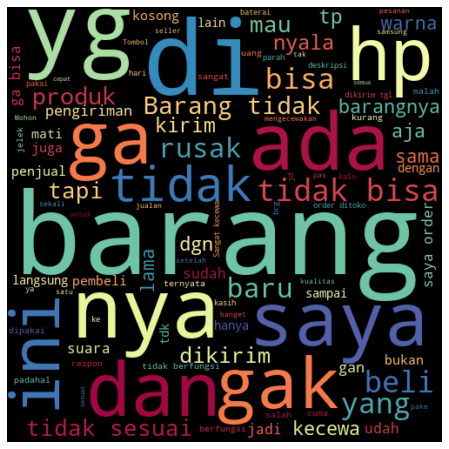

In [21]:
# Bintang 1 WordCloud
data_1 = data.loc[data['rating']==1]

#===
Message_body_1 = " ".join(insul for insul in data_1.text)

#== 
wc1 = WordCloud(background_color='black', mode='RGB',
               width=500, max_words=100, height=500,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
               
print('\n\nWord Cloud for 1 Star\n\n')
wc1.generate(Message_body_1)
plt.figure(figsize=(16, 8))
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

# 5. Data Preprocessing

## 5.1. Data Cleaning

In [91]:
values = [3, 4, 5]
data = data[data.rating.isin(values) == False]

In [92]:
data

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
12,4267,"speaker tidak jelas, jadi belum bisa dipakai",2,handphone,HP SAMSUNG Piton B310 Handphone SM-B320E Guru ...,411502661,108,4366642,https://www.tokopedia.com/fortuneid29/hp-samsu...
13,4268,"Paketannya sdh sampai, kecewa ! Pantesan aja m...",2,handphone,HP SAMSUNG Piton B310 Handphone SM-B320E Guru ...,411502661,108,4366642,https://www.tokopedia.com/fortuneid29/hp-samsu...
43,4299,"Beli 2 biji, 2-2 patah di tmpt yg sama di bagi...",1,handphone,Car phone holder 360 derajat model jepit smart...,206580458,156,442217,https://www.tokopedia.com/king-accessories/car...
75,4331,barang sesuai deskripsi tetapi tidak bs menemp...,2,handphone,Car phone holder 360 derajat model jepit smart...,206580458,156,442217,https://www.tokopedia.com/king-accessories/car...
113,4369,Saya pikir bahannya bagus.. tp ya sudahlah.. w...,2,handphone,Kaca pembesar Layar Hp/ Enlarged Screen Handphone,288580870,703,2993850,https://www.tokopedia.com/jsn25/kaca-pembesar-...
...,...,...,...,...,...,...,...,...,...
5993,10297,Barang tidak lengkap .tidak sesuwai jawaban di...,1,handphone,RJH30E2 360V 30A Transistor Mosfet IGBT TO220 ...,339057766,16,715011,https://www.tokopedia.com/hpasesoris/rjh30e2-3...
6002,10306,Photo transistor tidak sesuai dengan produk yg...,1,handphone,D2553 2SD2553 2S D2553 2553 Silicon NPN Transi...,339117996,5,715011,https://www.tokopedia.com/hpasesoris/d2553-2sd...
6098,10402,Barangnya sampai tidak sesuai pesanan,1,handphone,SAMSUNG Charger ATADM10EBE - D900 Original,1822915,1,105244,https://www.tokopedia.com/janbun/samsung-charg...
6102,10406,"alhamduliah, barang sudah diterima.\ntapi kang...",2,handphone,Charger | Blackberry HDWQ10 Original,2269322,8,105244,https://www.tokopedia.com/janbun/charger-black...


## 5.1. Get Data for Model Inference

In [93]:
# Get Data for model Inference

data_inf = data.sample(10, random_state=25)
data_inf

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
1102,5370,Gan knp setelah d pasang kartu hp gg nyala mal...,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...
1490,5759,Produk baru seminggu udh mati. Gimana sih,1,handphone,Samsung lipat flip Caramel GT-E1272 samsung hp...,322389014,"2,2rb",3925407,https://www.tokopedia.com/hpmurahgrosirr/samsu...
3011,7287,"Produknya ternyata kosong,tp gpp lah.. Uangnya...",1,handphone,&#40;EA033&#41; Emergency Lampu/Light Surya SQ...,262842858,89,113813,https://www.tokopedia.com/handphonetiam/ea033-...
1368,5637,ga sama dengan gambar,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...
3402,7680,"Tidak bisa digunakan, di charge 1x langsung ga...",2,handphone,Headset Bluetooth Mini S530 - Micro Sport Ster...,55299234,"4,4rb",113813,https://www.tokopedia.com/handphonetiam/headse...
5946,10249,"Bukan barang baru, ic mati",1,handphone,ITE IT8502E IT 8502E KXA JXS JXT JXA BF51,338299875,2,715011,https://www.tokopedia.com/hpasesoris/ite-it850...
4516,8805,timbangan tidak sesuai... beda sampai 8 kg pa...,1,handphone,&#40;ED021&#41; Magic Saw Gergaji Magic Set Se...,282043088,355,113813,https://www.tokopedia.com/handphonetiam/ed021-...
3634,7914,"Pesen 2 pcs yang satunya mati total, udah masu...",1,handphone,Headset Bluetooth Mini S530 - Micro Sport Ster...,55299234,"4,4rb",113813,https://www.tokopedia.com/handphonetiam/headse...
4690,8979,Tidak bisa di pakai gan barangnya,1,handphone,&#40;IA034&#41; PUBG Fire MOBILE Button L1R1 T...,293439771,266,113813,https://www.tokopedia.com/handphonetiam/ia034-...
1056,5324,Terima kasih banyak ooo tapi barang gak ori,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...


In [94]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
12,4267,"speaker tidak jelas, jadi belum bisa dipakai",2,handphone,HP SAMSUNG Piton B310 Handphone SM-B320E Guru ...,411502661,108,4366642,https://www.tokopedia.com/fortuneid29/hp-samsu...
13,4268,"Paketannya sdh sampai, kecewa ! Pantesan aja m...",2,handphone,HP SAMSUNG Piton B310 Handphone SM-B320E Guru ...,411502661,108,4366642,https://www.tokopedia.com/fortuneid29/hp-samsu...
43,4299,"Beli 2 biji, 2-2 patah di tmpt yg sama di bagi...",1,handphone,Car phone holder 360 derajat model jepit smart...,206580458,156,442217,https://www.tokopedia.com/king-accessories/car...
75,4331,barang sesuai deskripsi tetapi tidak bs menemp...,2,handphone,Car phone holder 360 derajat model jepit smart...,206580458,156,442217,https://www.tokopedia.com/king-accessories/car...
113,4369,Saya pikir bahannya bagus.. tp ya sudahlah.. w...,2,handphone,Kaca pembesar Layar Hp/ Enlarged Screen Handphone,288580870,703,2993850,https://www.tokopedia.com/jsn25/kaca-pembesar-...
...,...,...,...,...,...,...,...,...,...
5993,10297,Barang tidak lengkap .tidak sesuwai jawaban di...,1,handphone,RJH30E2 360V 30A Transistor Mosfet IGBT TO220 ...,339057766,16,715011,https://www.tokopedia.com/hpasesoris/rjh30e2-3...
6002,10306,Photo transistor tidak sesuai dengan produk yg...,1,handphone,D2553 2SD2553 2S D2553 2553 Silicon NPN Transi...,339117996,5,715011,https://www.tokopedia.com/hpasesoris/d2553-2sd...
6098,10402,Barangnya sampai tidak sesuai pesanan,1,handphone,SAMSUNG Charger ATADM10EBE - D900 Original,1822915,1,105244,https://www.tokopedia.com/janbun/samsung-charg...
6102,10406,"alhamduliah, barang sudah diterima.\ntapi kang...",2,handphone,Charger | Blackberry HDWQ10 Original,2269322,8,105244,https://www.tokopedia.com/janbun/charger-black...


In [95]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,5370,Gan knp setelah d pasang kartu hp gg nyala mal...,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...
1,5759,Produk baru seminggu udh mati. Gimana sih,1,handphone,Samsung lipat flip Caramel GT-E1272 samsung hp...,322389014,"2,2rb",3925407,https://www.tokopedia.com/hpmurahgrosirr/samsu...
2,7287,"Produknya ternyata kosong,tp gpp lah.. Uangnya...",1,handphone,&#40;EA033&#41; Emergency Lampu/Light Surya SQ...,262842858,89,113813,https://www.tokopedia.com/handphonetiam/ea033-...
3,5637,ga sama dengan gambar,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...
4,7680,"Tidak bisa digunakan, di charge 1x langsung ga...",2,handphone,Headset Bluetooth Mini S530 - Micro Sport Ster...,55299234,"4,4rb",113813,https://www.tokopedia.com/handphonetiam/headse...
5,10249,"Bukan barang baru, ic mati",1,handphone,ITE IT8502E IT 8502E KXA JXS JXT JXA BF51,338299875,2,715011,https://www.tokopedia.com/hpasesoris/ite-it850...
6,8805,timbangan tidak sesuai... beda sampai 8 kg pa...,1,handphone,&#40;ED021&#41; Magic Saw Gergaji Magic Set Se...,282043088,355,113813,https://www.tokopedia.com/handphonetiam/ed021-...
7,7914,"Pesen 2 pcs yang satunya mati total, udah masu...",1,handphone,Headset Bluetooth Mini S530 - Micro Sport Ster...,55299234,"4,4rb",113813,https://www.tokopedia.com/handphonetiam/headse...
8,8979,Tidak bisa di pakai gan barangnya,1,handphone,&#40;IA034&#41; PUBG Fire MOBILE Button L1R1 T...,293439771,266,113813,https://www.tokopedia.com/handphonetiam/ia034-...
9,5324,Terima kasih banyak ooo tapi barang gak ori,1,handphone,NOKIA 130 dual sim handphone hp,266910555,"2,7rb",2270419,https://www.tokopedia.com/anshopp123/nokia-130...


## 5.2. Text to Lowercase, Removing Punctuations, Removing Other Non Needed Texts, Removing Stopwords

In [96]:
seg = ['cat', 'bat','rat']
seg[seg.index('bat')]

'bat'

In [129]:
# A Function to use in the dataframe

def text_process(text):

  # 1. Change all text to Lowercase
  text = text.lower()
  
  # 2. Removing Mentions
  text = re.sub("@[A-Za-z0-9_]+", " ", text)
  
  # 3. Removing Hashtags
  text = re.sub("#[A-Za-z0-9_]+", " ", text)
  
  # 4. Removing \n
  text = re.sub(r"\\n", " ",text)
  
  # 5. Removing Whitespaces
  text = text.strip()

  # 6. Removing Links
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # 7. Removing non text characters such as Emojis, Mathematical symbols
  text = re.sub("[^A-Za-z\s']", " ", text)

  # 8. Removing RT
  text = re.sub("rt", " ",text)

  # 9. Removing Punctuations
  text = text.translate(str.maketrans('', '', string.punctuation))

  # 11. Tokenization
  sfg = word_tokenize(text)

  for x in range(len(sfg)):
    for i in range(len(slang_list)):
      if sfg[x] == slang_list[i]:
        sfg[x] = fix_list[i]
      else:
        pass
      
  # 10. Removing Stopwords
  stopwords_id = list(set(stopwords.words('indonesian')))
  stopwords_id = stopwords_id+['yang', 'di', 'nya']
  text = [word for word in sfg if word not in stopwords_id]

  from nltk.util import ngrams
  _2gram = [' '.join(e) for e in ngrams(text, 2)]
  _3gram = [' '.join(e) for e in ngrams(text, 3)]
  text = text + _2gram + _3gram

  
  #text2 = ' '.join(sfg)

  text = np.array(text)

  
  return text

In [130]:
# Applying Preprocessing to all Documents

data_train_test['text_processed'] = data_train_test['text'].apply(lambda x: text_process(x))

In [131]:
Message_body = data_train_test['text']
Message_body

0           speaker tidak jelas, jadi belum bisa dipakai
1      Paketannya sdh sampai, kecewa ! Pantesan aja m...
2      Beli 2 biji, 2-2 patah di tmpt yg sama di bagi...
3      barang sesuai deskripsi tetapi tidak bs menemp...
4      Saya pikir bahannya bagus.. tp ya sudahlah.. w...
                             ...                        
410    Barang tidak lengkap .tidak sesuwai jawaban di...
411    Photo transistor tidak sesuai dengan produk yg...
412                Barangnya sampai tidak sesuai pesanan
413    alhamduliah, barang sudah diterima.\ntapi kang...
414    kayaknya enggak ori, pengisian lambat tidak se...
Name: text, Length: 415, dtype: object

In [132]:
Message_body = data_train_test['text_processed']
Message_body

0                    [speaker, dipakai, speaker dipakai]
1      [paketannya, kecewa, pantesan, murah, samsung,...
2      [beli, biji, patah, pe, emuan, suction, beli b...
3      [barang, sesuai, deskripsi, menempel, interior...
4      [pikir, bahannya, bagus, iya, harganya, mahal,...
                             ...                        
410    [barang, lengkap, sesuwai, diskusi, barang len...
411    [photo, transistor, sesuai, produk, dikirim, d...
412    [barangnya, sesuai, pesanan, barangnya sesuai,...
413    [alhamduliah, barang, diterima, kang, kabel, u...
414    [kayaknya, ori, pengisian, lambat, sepe, i, or...
Name: text_processed, Length: 415, dtype: object

## 5.3. Pipeline

In [ ]:
# Convert String into Numerical Vocabularies

count_vect = CountVectorizer()

X_train_vect = count_vect.fit_transform(data_train_test.text_processed)

In [ ]:
# Text Vectorization (For Layer 1)

text_vectorization = TextVectorization(standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=2,
                                       output_mode="int",
                                       input_shape=(1,)
                                       )

text_vectorization.adapt(data_train_test.text_processed)

## 5.3. Bag of Words

In [ ]:
data_train_test['text_processed']

In [ ]:
red = np.array(red)

In [133]:
dictionary = gensim.corpora.Dictionary(Message_body)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 dipakai
1 speaker
2 speaker dipakai
3 asli
4 kecewa
5 kecewa pantesan
6 kecewa pantesan murah
7 murah
8 murah samsung
9 murah samsung asli
10 paketannya


In [134]:
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)

## 5.4. TF-IDF

In [135]:
bow_corpus = [dictionary.doc2bow(doc) for doc in Message_body]

In [136]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 1.0)]


## 5.5. LDA

In [139]:
bow_corpus

[[(0, 1)],
 [(1, 1)],
 [(2, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(6, 1), (8, 1), (9, 1), (10, 1), (11, 1)],
 [(3, 2), (6, 1), (7, 1), (10, 1)],
 [],
 [(12, 1)],
 [(13, 1)],
 [(3, 1), (14, 1)],
 [],
 [(3, 1), (15, 1), (16, 1), (17, 1), (18, 1)],
 [],
 [(3, 1), (15, 1), (18, 1), (19, 1)],
 [(20, 1), (21, 1), (22, 1), (23, 1)],
 [(21, 1)],
 [(24, 1), (25, 1)],
 [],
 [(7, 1), (20, 1)],
 [(13, 1), (18, 1)],
 [],
 [(13, 1), (26, 2), (27, 1)],
 [(1, 1), (3, 1), (19, 1), (23, 2), (24, 1)],
 [(28, 1)],
 [(2, 1), (11, 3)],
 [(29, 1)],
 [(30, 1)],
 [(3, 2), (10, 1), (30, 1)],
 [(7, 1)],
 [(1, 1), (3, 1)],
 [(3, 1), (6, 1), (7, 1), (9, 2), (13, 1), (15, 1), (18, 1), (31, 1), (32, 1)],
 [(26, 1), (27, 1), (33, 1), (34, 1), (35, 1)],
 [(3, 1)],
 [(2, 1), (18, 1)],
 [(11, 1), (17, 1), (33, 1), (34, 1), (35, 1)],
 [(14, 1), (27, 1), (32, 1), (36, 1), (37, 1)],
 [(27, 1), (29, 1)],
 [(1, 1)],
 [(23, 2), (38, 1)],
 [(3, 2), (4, 1), (5, 1), (6, 2), (7, 1), (29, 2), (30, 1), (36, 1), (37, 1)]

In [140]:
dictionary

In [141]:
len(dictionary)

53

In [137]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2, random_state=5)

In [138]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.169*"barang" + 0.088*"sesuai" + 0.076*"iya" + 0.065*"barang sesuai" + 0.042*"nyala" + 0.037*"suara" + 0.035*"pakai" + 0.033*"dipakai" + 0.029*"cepat" + 0.026*"barangnya"
Topic: 1 
Words: 0.176*"sesuai" + 0.107*"warna" + 0.101*"barang" + 0.083*"kualitas" + 0.056*"jelek" + 0.049*"harga" + 0.045*"produk" + 0.040*"dikirim" + 0.040*"rusak" + 0.039*"deskripsi"
Topic: 2 
Words: 0.314*"barang" + 0.065*"beli" + 0.051*"pengiriman" + 0.037*"kasih" + 0.036*"pakai" + 0.036*"konfirmasi" + 0.034*"dikirim" + 0.033*"penjual" + 0.030*"kualitas" + 0.029*"nyala"
Topic: 3 
Words: 0.200*"hp" + 0.135*"berfungsi" + 0.079*"kecewa" + 0.068*"produk" + 0.059*"suara" + 0.057*"baterai" + 0.055*"habis" + 0.043*"barangnya" + 0.039*"juragan" + 0.037*"cepat"
Topic: 4 
Words: 0.111*"warna" + 0.105*"terima kasih" + 0.100*"pesan" + 0.094*"dikirim" + 0.080*"sesuai" + 0.070*"langsung" + 0.052*"barangnya" + 0.036*"barang" + 0.030*"kasih" + 0.028*"produk"
Topic: 5 
Words: 0.181*"barang" + 0.115*"dikirim" + 

# `Sequential API`

# 6. Model Definition

In [ ]:
# Create Sequential API
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GlobalAveragePooling1D())

# Hidden Layer 1
model.add(Dense(32,activation='relu'))

# Output Layer
model.add(Dense(1,activation='sigmoid'))

# Compiling
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics='accuracy')

model.summary()

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model, show_shapes=True)

# 7. Model Training

In [ ]:
# Train the Model

history_1 = model.fit(train_dataset, epochs=30, validation_data=val_dataset)

# 8. Model Evaluation

In [ ]:
# Create Dataframe

history_seq_df = pd.DataFrame(history_1.history)
history_seq_df

Di `Epoch` ke 18 model sudah mulai tidak menunjukkan kenaikan atau penurunan lagi pada `Accuracy` maupun `Loss` nya. Bisa dibilang model ini cukup bagus untuk digunakan karena accuracy score nya sekitar `98%`. Dimana `2%` miss akan tidak sangat berpengaruh di dalam prediksi.

In [ ]:
# Plot between Accuracy and val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

In [ ]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

Model ini mulai stagnan di epoch ke `18` tidak menunjukkan perubahan naik atau turun di `Accuracy` ataupun `Loss`.

In [ ]:
# Model Evaluation using Classification Report

y_pred_seq = model.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

Highlight disini adalah Model mendapatkan :

- Accuracy Score = `98%`
- Serta di prediksi Non-Spam = `99%`
- Di prediksi Spam = `95%`

Bisa dibilang model ini cukup bagus untuk memprediksi atau mengklasifikasikan apakah email itu spam atau non-spam

In [ ]:
# Check Confusion Matrix

cm = confusion_matrix(y_test, y_pred_seq)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No Spam', 'Spam'], 
            yticklabels = ['No Spam', 'Spam'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Sequential API Baseline")
plt.show()

Dari total :

- Non Spam = 131 total, ada 1 yang salah prediksi menjadi spam
- Spam = 30 total, ada 2 yang salah prediksi menjadi non-spam

# `Sequential API - Model Improvement`

# 6. Model Definition

In [ ]:
# Create Sequential API
model_imp = Sequential()
model_imp.add(text_vectorization)
model_imp.add(embedding)
model_imp.add(GlobalAveragePooling1D())

# Hidden Layer 1
model_imp.add(Dense(32,activation='relu'))

# Output Layer
model_imp.add(Dense(1,activation='sigmoid'))

# Compiling
model_imp.compile(loss='binary_crossentropy',optimizer='Nadam',metrics='accuracy')

model_imp.summary()

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_imp, show_shapes=True)

# 7. Model Training

In [ ]:
# Train the Model

history_imp = model_imp.fit(train_dataset, epochs=30, validation_data=val_dataset)

# 8. Model Evaluation

In [ ]:
# Create Dataframe

history_imp_df = pd.DataFrame(history_imp.history)
history_imp_df

Di `Epoch` ke 11 model sudah mulai tidak menunjukkan kenaikan atau penurunan lagi pada `Accuracy` maupun `Loss` nya. Bisa dibilang model ini cukup bagus untuk digunakan karena accuracy score nya sekitar `98%`. Dimana `2%` miss akan tidak sangat berpengaruh di dalam prediksi.

Bisa dibilang menggunakan optimizer `Nadam` model ini lebih cepat belajar data train nya.

In [ ]:
# Plot between Accuracy and val_accuracy

history_imp_df[['accuracy', 'val_accuracy']].plot()

In [ ]:
# Plot between loss and val_loss

history_imp_df[['loss', 'val_loss']].plot()

Meskipun model ini fast learner, tapi accuracy nya `over-fit` dimana validation accuracy nya di bawah train accuracy nya.

In [ ]:
# Model Evaluation using Classification Report

y_pred_seq = model_imp.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

Highlight disini adalah Model mendapatkan :

- Accuracy Score = `98%`
- Serta di prediksi Non-Spam = `98%`
- Di prediksi Spam = `93%`

Menurun dari model pertama

In [ ]:
# Check Confusion Matrix

cm = confusion_matrix(y_test, y_pred_seq)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No Spam', 'Spam'], 
            yticklabels = ['No Spam', 'Spam'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Sequential API Model Improvement")
plt.show()

Dari total :

- Non Spam = 131 total, ada 2 yang salah prediksi menjadi spam
- Spam = 30 total, ada 2 yang salah prediksi menjadi non-spam

Menurun dari model yang pertama, dimana salah prediksi true label non-spam hanya 1

# 9. Model Saving

In [ ]:
# Freeze Best Model

model.trainable = False

In [ ]:
# Best Model Summary

model.summary()

In [ ]:
model.save("spam_check_model")

In [ ]:
! zip -r spam_check_model.zip spam_check_model

# 10. Model Inference

In [ ]:
# Display Inference-Set 

data_inf

In [ ]:
# A Function to use in the dataframe

def text_process(text):

  # 1. Change all text to Lowercase
  text = text.lower()
  
  # 2. Removing Mentions
  text = re.sub("@[A-Za-z0-9_]+", " ", text)
  
  # 3. Removing Hashtags
  text = re.sub("#[A-Za-z0-9_]+", " ", text)
  
  # 4. Removing \n
  text = re.sub(r"\\n", " ",text)
  
  # 5. Removing Whitespaces
  text = text.strip()

  # 6. Removing Links
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # 7. Removing non text characters such as Emojis, Mathematical symbols
  text = re.sub("[^A-Za-z\s']", " ", text)

  # 8. Removing RT
  text = re.sub("rt", " ",text)

  # 9. Tokenization
  tokens = word_tokenize(text)

  # 10. Removing Stopwords
  stopwords_en = list(set(stopwords.words('english')))
  text = ' '.join([word for word in tokens if word not in stopwords_en])
  
  # 11. Stemming
  stemmer = PorterStemmer()
  text = stemmer.stem(text)
  
  return text

In [ ]:
# Applying Preprocessing to all Documents

data_inf['Message_processed'] = data_inf['Message_body'].apply(lambda x: text_process(x))
data_inf

In [ ]:
data_inf_x = data_inf['Message_processed']

In [ ]:
# Predict using Best Model & Change if >= 0.5 to 1

y_pred_inf = model.predict(data_inf_x)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

In [ ]:
# Create DataFrame of Label Prediction using Best Model

y_pred_inf_data = pd.DataFrame(y_pred_inf, columns=['Label_Prediction'])
y_pred_inf_data

In [ ]:
# Concate between Inference-Set and Label's Prediction Best Model

data_inf = pd.concat([data_inf, y_pred_inf_data], axis=1)
data_inf

Tidak ada salah prediksi dari keseluruhan sample.

# 11. Pengambilan Kesimpulan

Di jaman era teknologi sekarang, kebanyakan orang sudah mengirimkan promosi ataupun ads ataupun text melalui email. Namun ada beberapa yang spam email, dan sangat mengganggu inbox email. Model ini dibuat untuk mengklasifikasikan apakah email itu spam atau tidak, jadi kita tidak perlu menghabiskan waktu di email tersebut. Dan tidak terjerumus ke pishing email.

Dengan menggunakan model yang telah saya buat. Best modelnya yaitu Baseline Model, mendapatkan tingkat sebagai berikut :

- Accuracy Score : `98%`
- True Label 0 : `99%`
- True Label 1 : `95%`

dan di sample testing tidak ada salah prediksi dari keseluruhan meskipun kata-kata sudah dilakukan preprocessing, model dapat secara benar memprediksi label nya masing-masing.